In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
df= pd.read_csv('NHANES_age_prediction 2.csv')
df

,SEQN,age_group,RIDAGEYR_AGE,RIAGENDR_GENDER,PAQ605_ACTIVITY,BMXBMI_BMI,LBXGLU_GLUCOSE,DIQ010_DIBETIC,LBXGLT_ORAL,LBXIN_INSULIN
0,82480.0,Child,12.0,1.0,1.0,16.5,102.0,2.0,85.0,8.30
1,74130.0,Child,12.0,1.0,2.0,14.5,85.0,2.0,91.0,10.86
2,77379.0,Child,12.0,1.0,2.0,15.4,89.0,2.0,119.0,5.79
3,80957.0,Child,12.0,1.0,2.0,15.7,89.0,2.0,83.0,3.77
4,75715.0,Child,12.0,1.0,2.0,15.9,98.0,2.0,109.0,17.13
...,...,...,...,...,...,...,...,...,...,...
2273,76734.0,Senior,80.0,2.0,2.0,35.3,123.0,2.0,250.0,32.52
2274,75324.0,Senior,80.0,2.0,2.0,35.8,89.0,2.0,95.0,11.93
2275,82945.0,Senior,80.0,2.0,2.0,36.9,105.0,2.0,102.0,8.05
2276,75010.0,Senior,80.0,2.0,2.0,37.1,101.0,2.0,154.0,14.59


In [4]:
df.shape

(2278, 10)

In [5]:
df.describe()

,SEQN,RIDAGEYR_AGE,RIAGENDR_GENDER,PAQ605_ACTIVITY,BMXBMI_BMI,LBXGLU_GLUCOSE,DIQ010_DIBETIC,LBXGLT_ORAL,LBXIN_INSULIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


In [6]:
df.info

<bound method DataFrame.info of          SEQN age_group  RIDAGEYR_AGE  RIAGENDR_GENDER  PAQ605_ACTIVITY  \
0     82480.0     Child          12.0              1.0              1.0   
1     74130.0     Child          12.0              1.0              2.0   
2     77379.0     Child          12.0              1.0              2.0   
3     80957.0     Child          12.0              1.0              2.0   
4     75715.0     Child          12.0              1.0              2.0   
...       ...       ...           ...              ...              ...   
2273  76734.0    Senior          80.0              2.0              2.0   
2274  75324.0    Senior          80.0              2.0              2.0   
2275  82945.0    Senior          80.0              2.0              2.0   
2276  75010.0    Senior          80.0              2.0              2.0   
2277  76631.0    Senior          80.0              2.0              2.0   

      BMXBMI_BMI  LBXGLU_GLUCOSE  DIQ010_DIBETIC  LBXGLT_ORAL  LBXI

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SEQN             2278 non-null   float64
 1   age_group        2278 non-null   object 
 2   RIDAGEYR_AGE     2278 non-null   float64
 3   RIAGENDR_GENDER  2278 non-null   float64
 4   PAQ605_ACTIVITY  2278 non-null   float64
 5   BMXBMI_BMI       2278 non-null   float64
 6   LBXGLU_GLUCOSE   2278 non-null   float64
 7   DIQ010_DIBETIC   2278 non-null   float64
 8   LBXGLT_ORAL      2278 non-null   float64
 9   LBXIN_INSULIN    2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


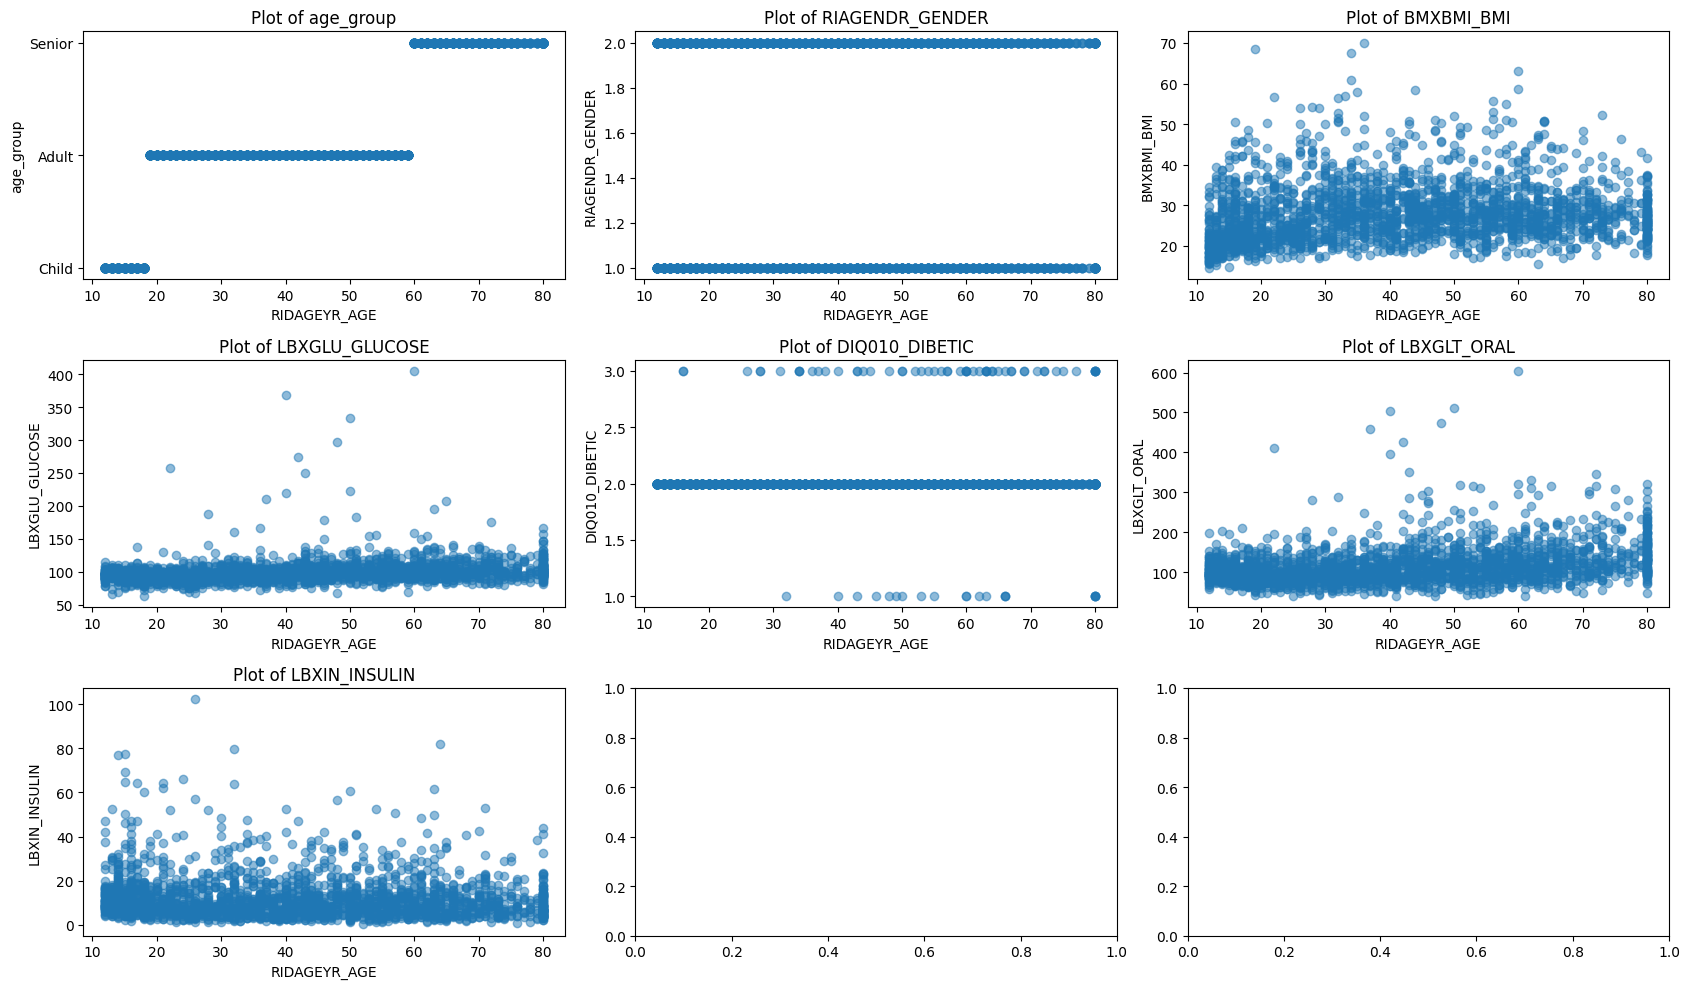

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('NHANES_age_prediction 2.csv')

# Create subplots for each of the headers
headers = [
    'age_group',
    'RIAGENDR_GENDER',
    'BMXBMI_BMI',
    'LBXGLU_GLUCOSE',
    'DIQ010_DIBETIC',
    'LBXGLT_ORAL',
    'LBXIN_INSULIN'
]

# Create subplots with 3 rows and 3 columns (for the 9 headers)
fig, axes = plt.subplots(3, 3, figsize=(17, 10))

# Set the X axis as RIDAGEYR_AGE for all plots
x = data['RIDAGEYR_AGE']

# Plot each header on a separate subplot
for i, header in enumerate(headers):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    y = data[header]

    ax.scatter(x, y, alpha=0.5)
    ax.set_xlabel('RIDAGEYR_AGE')
    ax.set_ylabel(header)

    ax.set_title(f"Plot of {header}")

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

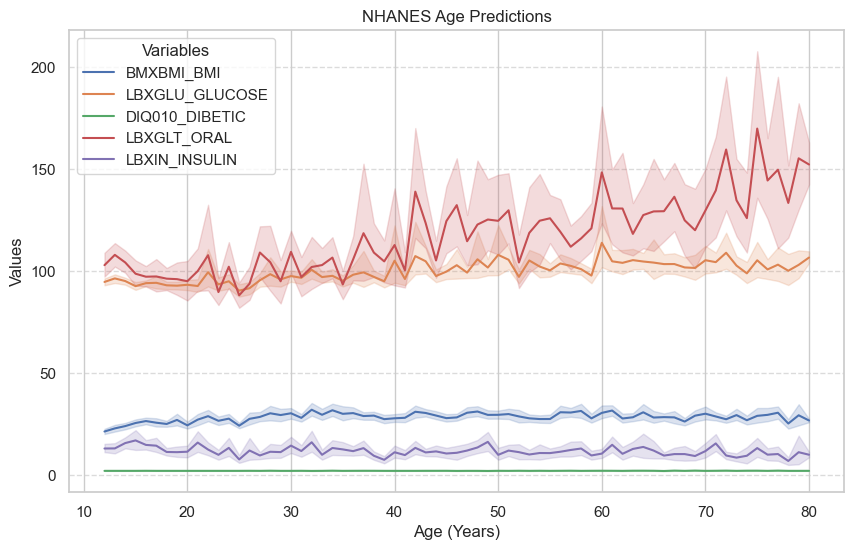

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the csv file
data = pd.read_csv('NHANES_age_prediction 2.csv')

# Set the Seaborn style
sns.set(style="whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data with vibrant colors
sns.lineplot(x='RIDAGEYR_AGE', y='BMXBMI_BMI', data=data, label='BMXBMI_BMI')
sns.lineplot(x='RIDAGEYR_AGE', y='LBXGLU_GLUCOSE', data=data, label='LBXGLU_GLUCOSE')
sns.lineplot(x='RIDAGEYR_AGE', y='DIQ010_DIBETIC', data=data, label='DIQ010_DIBETIC')
sns.lineplot(x='RIDAGEYR_AGE', y='LBXGLT_ORAL', data=data, label='LBXGLT_ORAL')
sns.lineplot(x='RIDAGEYR_AGE', y='LBXIN_INSULIN', data=data, label='LBXIN_INSULIN')

# Set the labels and title
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Values')
ax.set_title('NHANES Age Predictions')

# Display the legend with a title
ax.legend(title='Variables')

# Customize the grid
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Read the csv file
data = pd.read_csv('NHANES_age_prediction 2.csv')

# Encode the "age_group" column
le = LabelEncoder()
data['age_group'] = le.fit_transform(data['age_group'])

# Select the relevant columns for X and y
X = data[['RIAGENDR_GENDER', 'BMXBMI_BMI', 'LBXGLU_GLUCOSE', 'DIQ010_DIBETIC', 'LBXGLT_ORAL', 'LBXIN_INSULIN', 'age_group']]
y = data['RIDAGEYR_AGE']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X.iloc[:, :-1]), columns=X.columns[:-1])
X_scaled['age_group'] = X['age_group']  # Preserve the original age_group column

# Split the dataset into training and testing sets
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=0)

# Create and train the regression model
model = RandomForestRegressor(n_estimators=15,max_features=3, random_state=10)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_pred_test = model.predict(X_test)

# Calculate evaluation metrics on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
r_squared_test = r2_score(y_test, y_pred_test)

print("Mean Absolute Error on Test Set:", mae_test)
print("R-squared on Train Set:", model.score(X_train,y_train)*100)
print("R-squared on Test Set:", r_squared_test*100)

Mean Absolute Error on Test Set: 7.553760608721101
R-squared on Train Set: 96.191149802289
R-squared on Test Set: 77.35696152979786


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Read the csv file
# data = pd.read_csv('NHANES_age_prediction 2.csv')

# # Encode the "age_group" column
# le = LabelEncoder()
# data['age_group'] = le.fit_transform(data['age_group'])

# # Select the relevant columns for X and y
# X = data[['RIAGENDR_GENDER', 'BMXBMI_BMI', 'LBXGLU_GLUCOSE', 'DIQ010_DIBETIC', 'LBXGLT_ORAL', 'LBXIN_INSULIN', 'age_group']]
# y = data['RIDAGEYR_AGE']

# # Standardize numerical features
# scaler = StandardScaler()
# X_scaled = pd.DataFrame(scaler.fit_transform(X.iloc[:, :-1]), columns=X.columns[:-1])
# X_scaled['age_group'] = X['age_group']  # Preserve the original age_group column


# User input for age prediction
while True:
    # Prompt the user for input values
    age_group = le.transform([input("Enter age group (Child, Adult, Senior): ").capitalize()])[0]
    gender = int(input("Enter gender (1 for male, 2 for female): "))
    bmi = float(input("Enter BMI: "))
    glucose = float(input("Enter glucose level: "))
    diabetic = int(input("Enter diabetic status (2 for No, 1 for yes): "))
    oral = float(input("Enter oral: "))
    insulin = float(input("Enter insulin level: "))
    
    # Scale the user input
    user_input_scaled = scaler.transform([[gender, bmi, glucose, diabetic, oral, insulin]])[0]

    # Add age_group back to the scaled input
    user_input_scaled_with_age = [*user_input_scaled, age_group]

    # Make predictions based on user input
    predictions = model.predict([user_input_scaled_with_age])

    # Print the predicted age
    print("Predicted age:", predictions[0])

    another_prediction = input("Do you want to predict another age? (yes/no): ")
    if another_prediction.lower() != "yes":
        break


Enter age group (Child, Adult, Senior):  Adult
Enter gender (1 for male, 2 for female):  1
Enter BMI:  28
Enter glucose level:  101
Enter diabetic status (2 for No, 1 for yes):  2
Enter oral:  125
Enter insulin level:  14


C:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted age: 45.6


Do you want to predict another age? (yes/no):  yes
Enter age group (Child, Adult, Senior):  adult
Enter gender (1 for male, 2 for female):  2
Enter BMI:  34
Enter glucose level:  95
Enter diabetic status (2 for No, 1 for yes):  2
Enter oral:  120
Enter insulin level:  9


C:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\YASH SRIVASTAVA\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Predicted age: 47.46666666666667
